# Steps

- **Step 1: Import necessary libraries**
- **Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)**
- **Step 3: Creating a Linear Regression Model**
- **Step 4: Training the model using data set**
- **Step 5: Get the values of slope and intercept from the trained model**
- **Step 6: Display the equation of the line**
- **Step 7: Predit values using the model**
- **Step 8: Model Evaluation Metrics**
- **Step 9: Plot the regression line**
- **Step 910: Prediction Features**

In [57]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation

In [58]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [87]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [59]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [60]:
# Creating Linear Regression Model
LinearModel = LinearRegression()

In [61]:
LinearModel.fit(X,Y)

LinearRegression()

In [62]:
# Check slope & Intercept
m = LinearModel.coef_[0]
c = LinearModel.intercept_
print("Slope: ", m)
print("Intercept: ", c)

Slope:  4.965498141580592
Intercept:  27.430065779800533


In [63]:
print(f"Equation of the line: Y = {m:.2f} * X + {c:.2f}")

Equation of the line: Y = 4.97 * X + 27.43


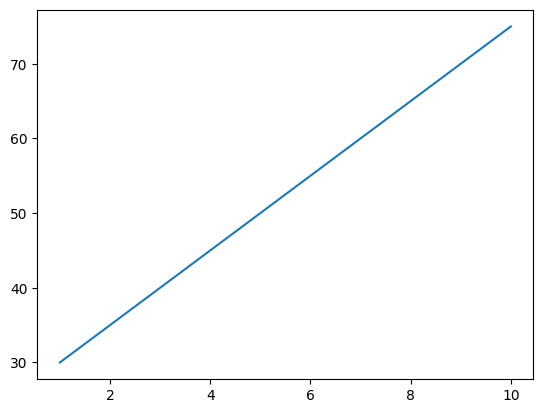

In [64]:
plt.plot(X, true_salaries)

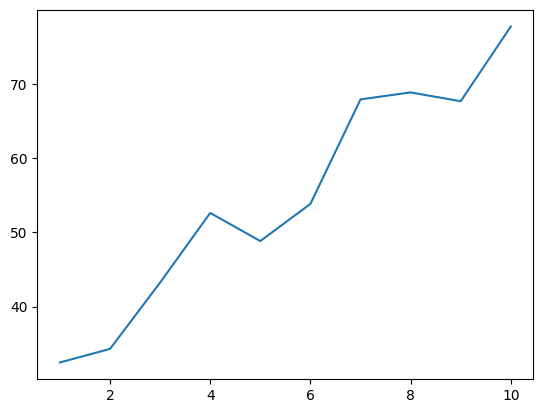

In [65]:
plt.plot(X,Y)

In [66]:
# Predicting the output
Y_pred = LinearModel.predict(X)

# Model Evalution Metrics

### $MSE = 1/n\sum_{k=1}^n(Y-Y_{pred})^2$
### $MAE = 1/n\sum_{k=1}^n|Y-Y_{pred}|$
### $RMSE = \sqrt {MSE}$

### $R^2 Score$ = $1-[ \sum(Y-Y_{pred})^2/\sum(Y-Y_{mean})^2 ]$
### $Adjusted$ $R^2 Score = 1 - [(1-R^2)(N-1)/N-p-1]$ 

   - N = Sample Size
   - p = No.of Independent Variables

In [67]:
mse = mean_squared_error(Y, Y_pred)
mae = mean_absolute_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_sc = r2_score(Y, Y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2_sc)

Mean Squared Error: 11.751853009895182
Mean Absolute Error: 2.868273465573678
Root Mean Squared Error: 3.428097578817613
R-squared Score: 0.9453822032109368


# Data Visualization

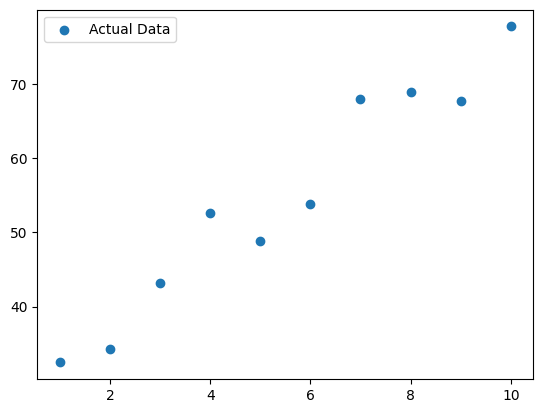

In [68]:
plt.scatter(X,Y, label="Actual Data")
plt.legend()
plt.show()

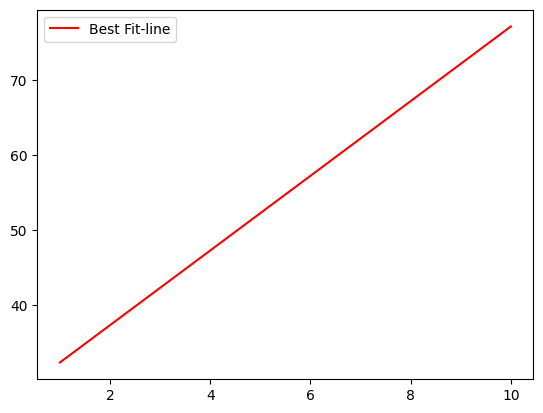

In [69]:
plt.plot(X,Y_pred, color="red", label="Best Fit-line")
plt.legend()
plt.show()

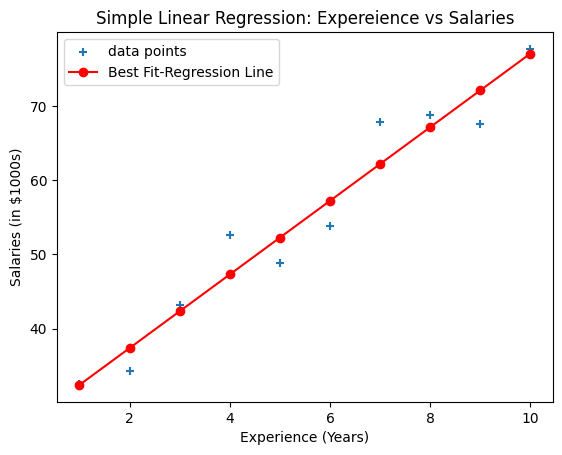

In [70]:
plt.scatter(x=X, y=Y, label = "data points", marker="+")
plt.plot(X, Y_pred, label = "Best Fit-Regression Line", color ="red", marker="o")
plt.title("Simple Linear Regression: Expereience vs Salaries")
plt.xlabel("Experience (Years)")
plt.ylabel("Salaries (in $1000s)")
plt.legend()
plt.show()

In [71]:
while True:
    try:
        exp = float(input("\nEnter years of experience to predict salary(or -1 to exit): "))
        if exp==-1:
            break
        predicted_salary = LinearModel.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please Enter a valid number!")


Enter years of experience to predict salary(or -1 to exit):  5


Predicted Salary for 5.0 years of experience: $52.26K



Enter years of experience to predict salary(or -1 to exit):  15


Predicted Salary for 15.0 years of experience: $101.91K



Enter years of experience to predict salary(or -1 to exit):  -1


In [76]:
#import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
#from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation

In [85]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
poly

PolynomialFeatures()

In [83]:
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [78]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:16:54   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\TEJA\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
